In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from tqdm import tqdm
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuragreddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anuragreddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
fake=pd.read_csv('Fake.csv')
real=pd.read_csv('True.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
print("Number of data points in fake_data", fake.shape)
print("Number of data points in real_data", real.shape)
print('-'*50)
print("The attributes of fake_data :",fake.columns.values)
print("The attributes of real_data", real.columns.values)

Number of data points in fake_data (23481, 4)
Number of data points in real_data (21417, 4)
--------------------------------------------------
The attributes of fake_data : ['title' 'text' 'subject' 'date']
The attributes of real_data ['title' 'text' 'subject' 'date']


In [6]:
fake['target']=0
real['target']=1
df=pd.concat([fake,real])
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
print("Number of data points after concatenating fake and real data:",df.shape)

Number of data points after concatenating fake and real data: (44898, 5)


In [8]:
#combining text and title
df['original'] = df['text'] + ' ' + df['title']
df.head()

,title,text,subject,date,target,original
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis used his annual Christmas Day mes...


<AxesSubplot:xlabel='target', ylabel='count'>

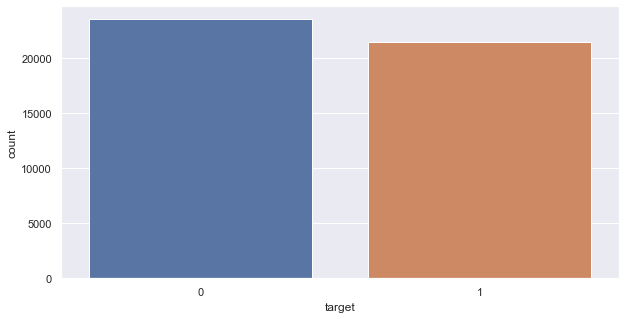

In [9]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(df['target'])

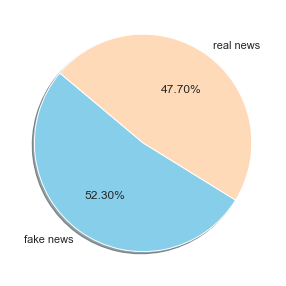

In [10]:
plt.figure(figsize=(10,5))
labels=['fake news','real news']
colors = ["SkyBlue","PeachPuff"]
plt.pie(df['target'].value_counts(),labels=labels,colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140) 
plt.show()

<AxesSubplot:xlabel='subject', ylabel='count'>

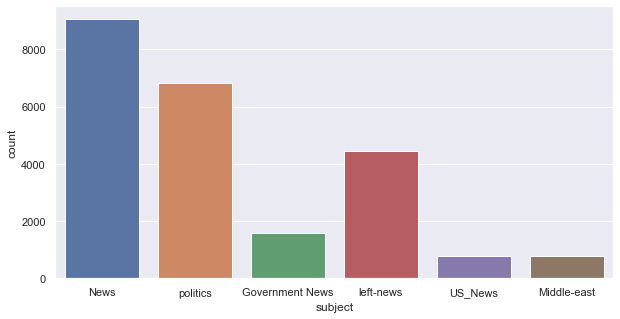

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(fake['subject'])

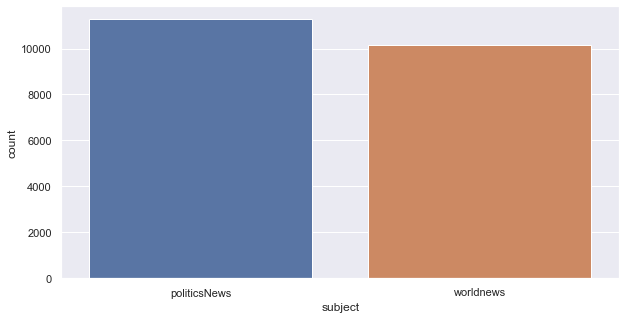

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(real['subject'])
plt.show()

<AxesSubplot:xlabel='subject', ylabel='count'>

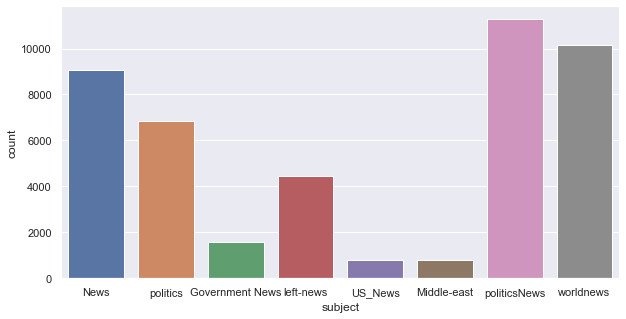

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['subject'])

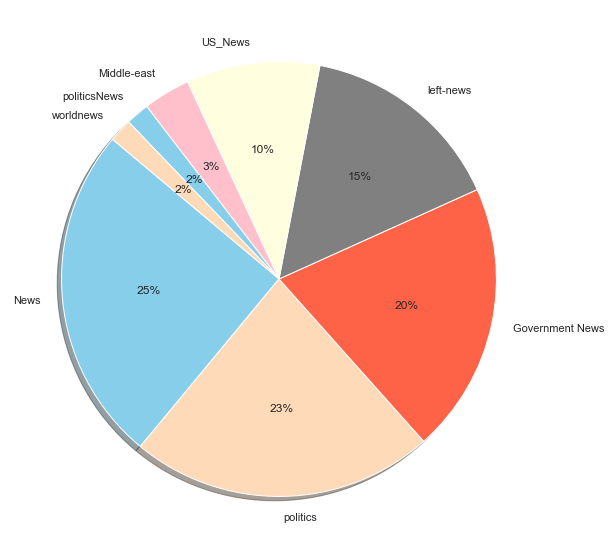

In [14]:
plt.figure(figsize=(10,10))
labels=['News','politics','Government News','left-news','US_News','Middle-east','politicsNews','worldnews']
colors = ["SkyBlue","PeachPuff",'tomato','gray','lightyellow','pink']
plt.pie(df['subject'].value_counts(),labels=labels,colors=colors,
        autopct='%1.f%%', shadow=True, startangle=140) 
plt.show()

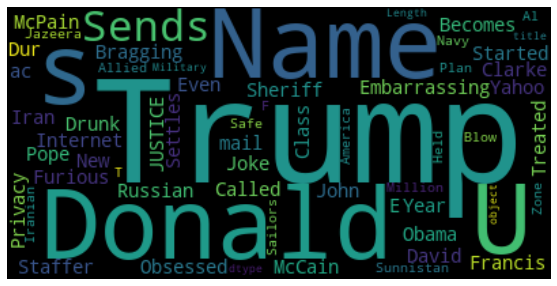

In [15]:
wordcloud = WordCloud(background_color="black").generate(str(fake['title']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

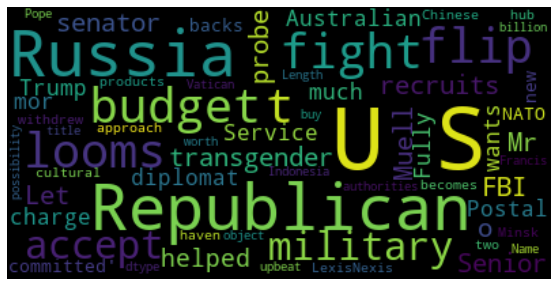

In [16]:
wordcloud = WordCloud(background_color="black").generate(str(real['title']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = sentance.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [18]:
df['original']= preprocess_text(df['original'].values)

100%|██████████████████████████████████████████████████████████████████████████| 44898/44898 [00:07<00:00, 6345.91it/s]


In [19]:
df.head()

,title,text,subject,date,target,original
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump just couldn t wish all americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,on friday it was revealed that former milwauke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,on christmas day donald trump announced that h...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis used his annual christmas day mes...


In [20]:
def data_preprocessing(data):
    ###Here we remove all trash in our text
    prep1 = data.lower()
    prep2 = re.sub('https?://\S+|www\.\S+', '', data)
    prep3 = re.sub('\\W', ' ', data)
    prep4 = re.sub('\n', '', data)
    prep5 = re.sub(' +', ' ', data)
    prep6 = re.sub('^ ', '', data)
    prep7 = re.sub(' $', '', data)
    return data

In [21]:
df['original'].apply(data_preprocessing)

0        donald trump just couldn t wish all americans ...
1        house intelligence committee chairman devin nu...
2        on friday it was revealed that former milwauke...
3        on christmas day donald trump announced that h...
4        pope francis used his annual christmas day mes...
                               ...                        
21412    brussels reuters nato allies on tuesday welcom...
21413    london reuters lexisnexis a provider of legal ...
21414    minsk reuters in the shadow of disused soviet ...
21415    moscow reuters vatican secretary of state card...
21416    jakarta reuters indonesia will buy 11 sukhoi f...
Name: original, Length: 44898, dtype: object

In [22]:
stop = set(stopwords.words('english'))
def remove_stopwords(data):
    words = [word for word in data if word not in stop]
    words= "".join(words).split()
    words= [words.lower() for words in data.split()]
    return words 

In [23]:
df['original'].apply(remove_stopwords)

0        [donald, trump, just, couldn, t, wish, all, am...
1        [house, intelligence, committee, chairman, dev...
2        [on, friday, it, was, revealed, that, former, ...
3        [on, christmas, day, donald, trump, announced,...
4        [pope, francis, used, his, annual, christmas, ...
                               ...                        
21412    [brussels, reuters, nato, allies, on, tuesday,...
21413    [london, reuters, lexisnexis, a, provider, of,...
21414    [minsk, reuters, in, the, shadow, of, disused,...
21415    [moscow, reuters, vatican, secretary, of, stat...
21416    [jakarta, reuters, indonesia, will, buy, 11, s...
Name: original, Length: 44898, dtype: object

In [24]:
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    lemmas = []
    for word in text.split():
        lemmas.append(lemmatizer.lemmatize(word))
    return " ".join(lemmas)

In [25]:
df['original'].apply(lemmatization)

0        donald trump just couldn t wish all american a...
1        house intelligence committee chairman devin nu...
2        on friday it wa revealed that former milwaukee...
3        on christmas day donald trump announced that h...
4        pope francis used his annual christmas day mes...
                               ...                        
21412    brussels reuters nato ally on tuesday welcomed...
21413    london reuters lexisnexis a provider of legal ...
21414    minsk reuters in the shadow of disused soviet ...
21415    moscow reuters vatican secretary of state card...
21416    jakarta reuters indonesia will buy 11 sukhoi f...
Name: original, Length: 44898, dtype: object

In [26]:
df.head()

,title,text,subject,date,target,original
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump just couldn t wish all americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,on friday it was revealed that former milwauke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,on christmas day donald trump announced that h...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis used his annual christmas day mes...


In [27]:
# saving the dataframe
df.to_csv('preprocessed_data_fake_real_news.csv')